In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import io
%cd "C:\Users\Santhosh\Downloads"

C:\Users\Santhosh\Downloads


In [3]:
SFdata=pd.read_csv("Air_Traffic_Passenger_Statistics.csv")

In [4]:
SFdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24967 entries, 0 to 24966
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              24967 non-null  int64 
 1   Operating Airline            24967 non-null  object
 2   Operating Airline IATA Code  24795 non-null  object
 3   Published Airline            24967 non-null  object
 4   Published Airline IATA Code  24795 non-null  object
 5   GEO Summary                  24967 non-null  object
 6   GEO Region                   24967 non-null  object
 7   Activity Type Code           24967 non-null  object
 8   Price Category Code          24967 non-null  object
 9   Terminal                     24967 non-null  object
 10  Boarding Area                24967 non-null  object
 11  Passenger Count              24967 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 2.3+ MB


In [5]:
SFdata.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090


In [6]:
SFdata['Activity Period']=SFdata['Activity Period'].astype(str)

In [7]:
SFdata['Activity Period']=SFdata['Activity Period'].str[:4]+'-'+SFdata['Activity Period'].str[4:]

In [8]:
SFdata['Activity Period'].head()

0    2005-07
1    2005-07
2    2005-07
3    2005-07
4    2005-07
Name: Activity Period, dtype: object

In [9]:
SFdata['Activity Period']=pd.to_datetime(SFdata['Activity Period'],
                                        format="%Y-%m",errors="coerce")

In [10]:
# Univariate Time Series Forecasting
ts_df=SFdata[['Activity Period','Passenger Count']]

In [11]:
# Resample Data into hourly or daily or monthly or weekly or quarterly
ts_df_monthly=ts_df.resample('M',on='Activity Period').sum()

In [12]:
ts_df_monthly.head() # Date is indexed to Rows

,Passenger Count
Activity Period,
2005-07-31,3225769
2005-08-31,3195866
2005-09-30,2740553
2005-10-31,2770715
2005-11-30,2617333


<AxesSubplot: xlabel='Activity Period'>

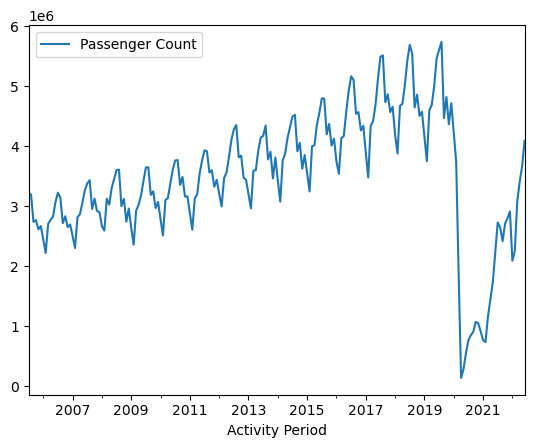

In [13]:
ts_df_monthly.plot()

In [14]:
from statsmodels.tsa.stattools import adfuller

In [15]:
adfuller(ts_df_monthly)
# Since p-value=0.05203995434117372 is slightly greater than 0.05,
# Fail to Reject Null

(-2.845673727819617,
 0.05203995434117387,
 13,
 190,
 {'1%': -3.4652439354133255,
  '5%': -2.8768752281673717,
  '10%': -2.574944653739612},
 5280.277965462544)

In [16]:
# If data is found non stationary, Discrete Differencing must be done
ts_df_monthly_diff=ts_df_monthly.diff()

In [17]:
ts_df_monthly_diff=ts_df_monthly_diff.dropna()

<AxesSubplot: xlabel='Activity Period'>

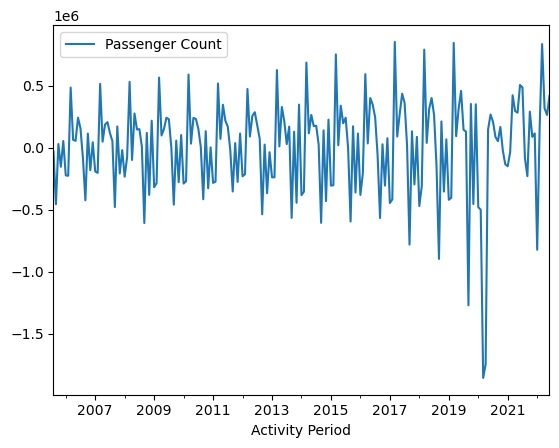

In [18]:
ts_df_monthly_diff.plot()

In [19]:
adfuller(ts_df_monthly_diff)
# Since p-value =0.007339645162428562 is less than 0.05, Reject Null

(-3.5261801346692843,
 0.007339645162428584,
 15,
 187,
 {'1%': -3.465811691080702,
  '5%': -2.877123351472649,
  '10%': -2.5750770662586864},
 5259.377049255135)

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

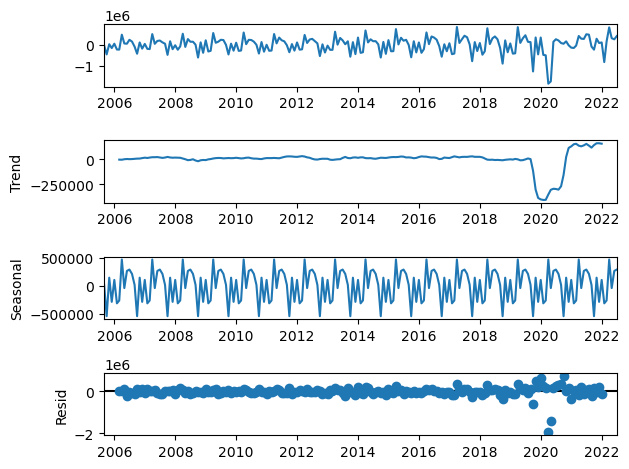

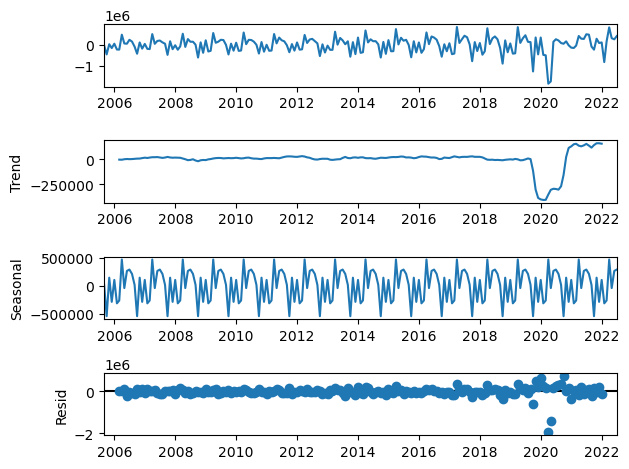

In [21]:
seasonal_decompose(ts_df_monthly_diff).plot()

In [22]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

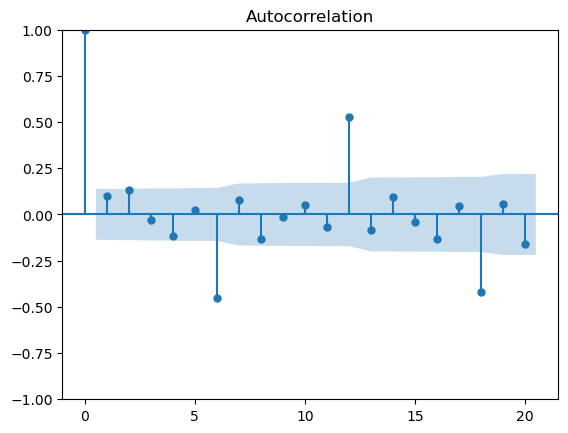

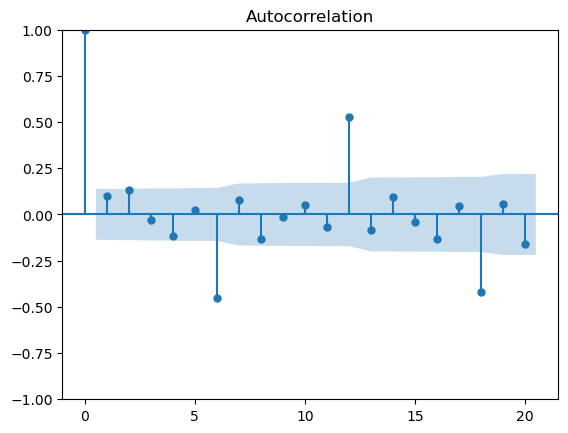

In [23]:
plot_acf(ts_df_monthly_diff,lags=20)

C:\Users\Santhosh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


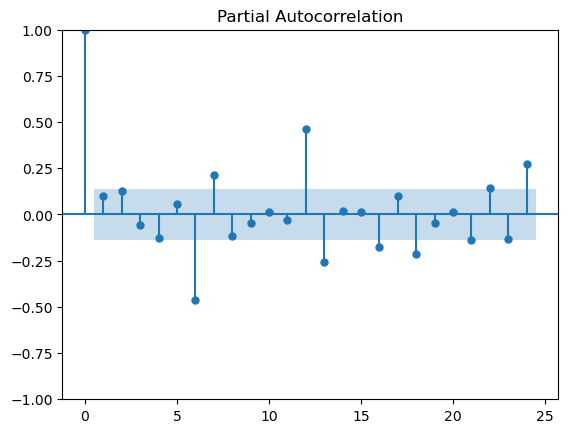

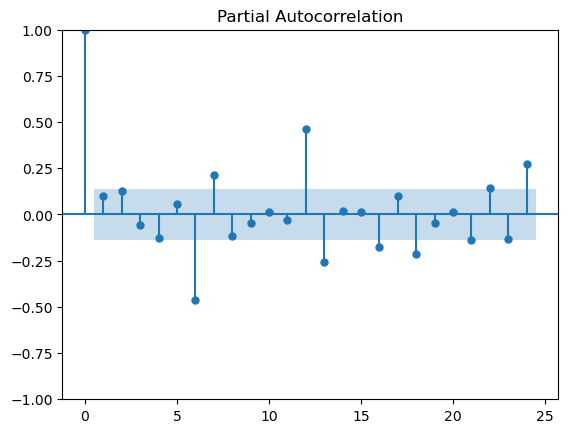

In [24]:
plot_pacf(ts_df_monthly_diff)

In [26]:
!pip install pmdarima

     ------------------------------------- 572.0/572.0 kB 35.1 MB/s eta 0:00:00


In [27]:
from pmdarima.arima import auto_arima

In [28]:
model=auto_arima(ts_df_monthly,start_p=0,start_q=0)

In [29]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  204
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2898.383
Date:                Thu, 09 Feb 2023   AIC                           5798.765
Time:                        21:13:53   BIC                           5802.078
Sample:                    07-31-2005   HQIC                          5800.106
                         - 06-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.469e+11   8.41e+09     17.469      0.000     1.3e+11    1.63e+11
===================================================================================
Ljung-Box (L1) (Q):                   2.00   Jarque-Bera (JB):               179.96
Prob(Q):                              0.16   Prob(JB):                         0.00
Heteroskedasticity (H):               3.61   Skew:                            -1.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
model.predict(n_periods=24)

2022-07-31    4094678.0
2022-08-31    4094678.0
2022-09-30    4094678.0
2022-10-31    4094678.0
2022-11-30    4094678.0
2022-12-31    4094678.0
2023-01-31    4094678.0
2023-02-28    4094678.0
2023-03-31    4094678.0
2023-04-30    4094678.0
2023-05-31    4094678.0
2023-06-30    4094678.0
2023-07-31    4094678.0
2023-08-31    4094678.0
2023-09-30    4094678.0
2023-10-31    4094678.0
2023-11-30    4094678.0
2023-12-31    4094678.0
2024-01-31    4094678.0
2024-02-29    4094678.0
2024-03-31    4094678.0
2024-04-30    4094678.0
2024-05-31    4094678.0
2024-06-30    4094678.0
Freq: M, dtype: float64

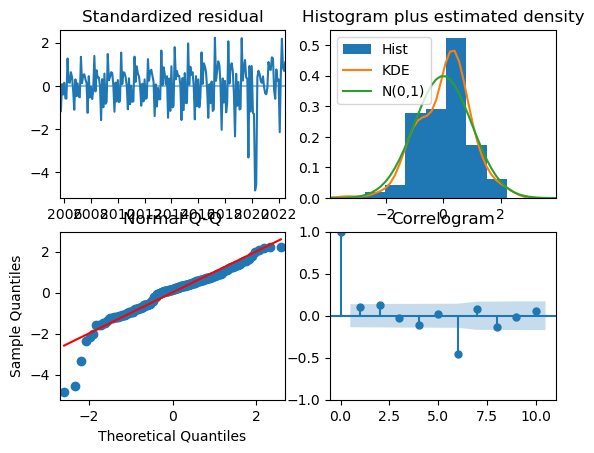

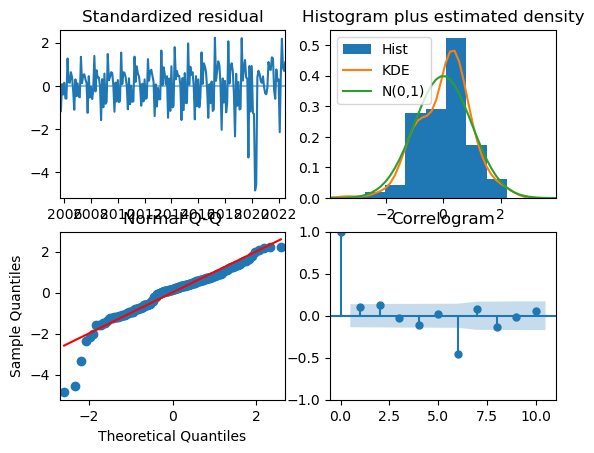

In [32]:
model.plot_diagnostics()

In [33]:
index_of_fc=pd.date_range(ts_df_monthly.index[-1],
                         periods=24,freq="M")

In [34]:
arimapredict=pd.DataFrame(model.predict(n_periods=24))

In [35]:
arimapredict.index=index_of_fc

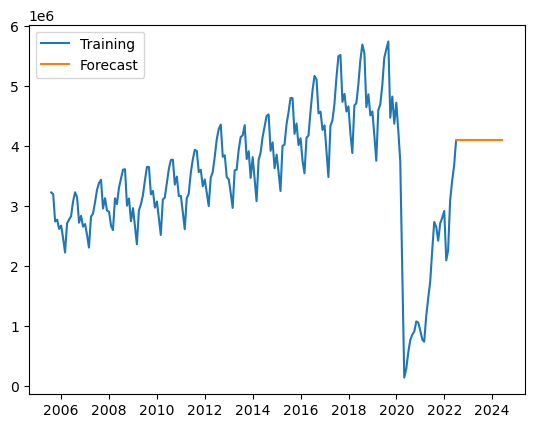

In [36]:
plt.plot(ts_df_monthly,label="Training")
plt.plot(arimapredict,label="Forecast")
plt.legend(loc="upper left")
plt.show()